# Check the quality of the data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

%matplotlib inline


In [438]:
# import data
df = pd.read_csv("../Data Vis proj/RecruitmentData.csv")

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 11 columns):
admit_term            1422 non-null int64
admit_level           1422 non-null object
gender                1422 non-null object
ethn_desc             1422 non-null object
is_urm                1398 non-null float64
first_generation      1396 non-null float64
low_income            1212 non-null float64
first_term_college    1422 non-null object
first_degree_term     740 non-null float64
graduation_college    740 non-null object
id                    1422 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 122.3+ KB


In [232]:
df.head() # print the data

,admit_term,admit_level,gender,ethn_desc,is_urm,first_generation,low_income,first_term_college,first_degree_term,graduation_college,id
0,201110,Freshman,F,White/Caucasian,0.0,1.0,0.0,LS,NaN,NaN,1
1,201110,Freshman,F,Filipino/Filipino-American,0.0,0.0,0.0,BI,201503.0,BI,2
2,201110,Transfer,M,White/Caucasian,0.0,1.0,1.0,LS,201310.0,LS,3
3,201110,Freshman,F,Latino/Other Spanish,1.0,0.0,0.0,AE,201503.0,AE,4
4,201110,Transfer,F,East Indian/Pakistani,0.0,1.0,NaN,LS,201303.0,LS,6


In [421]:
# count the missing value and find the missing rate
def Is_NaN(col):
    '''This function return the number of NAN value and missing rate in each columns.'''
    num = df[col].isnull().values.sum()  # num of missing value in each col
    rate = num / len(df['admit_term'])   # calculate the missing rate by divided the length
    return f'{num} & {rate:.3f} are {col} Nan values and missing rate'

In [422]:
# check the lengh without count the missing value
df.count() 

admit_term            1422
admit_level           1422
gender                1422
ethn_desc             1422
is_urm                1398
first_generation      1396
low_income            1212
first_term_college    1422
first_degree_term      740
graduation_college     740
id                    1422
dtype: int64

In [429]:
# apply each column to the function to get the missing value and missing rate

print(Is_NaN('is_urm')) 
print(Is_NaN('first_generation'))
print(Is_NaN('low_income'))
print(Is_NaN('first_degree_term'))
print(Is_NaN('graduation_college'))


24 & 0.017 are is_urm Nan values and missing rate
26 & 0.018 are first_generation Nan values and missing rate
210 & 0.148 are low_income Nan values and missing rate
682 & 0.480 are first_degree_term Nan values and missing rate
682 & 0.480 are graduation_college Nan values and missing rate


In [430]:
# check the unknowm in the ethn_desc
print(sum(df['ethn_desc'] == 'Unknown'),'Missing number in ethn_desc')
print(sum(df['ethn_desc'] == 'Unknown')/len(df['admit_term']),'Missing rate in ethn_desc')


24 Missing number in ethn_desc
0.016877637130801686 Missing rate in ethn_desc


# Student body changed over time

In [394]:
df.head() # review the data

,admit_term,admit_level,gender,ethn_desc,is_urm,first_generation,low_income,first_term_college,first_degree_term,graduation_college,id
0,201110,Freshman,F,White/Caucasian,0.0,1.0,0.0,LS,NaN,NaN,1
1,201110,Freshman,F,Filipino/Filipino-American,0.0,0.0,0.0,BI,201503.0,BI,2
2,201110,Transfer,M,White/Caucasian,0.0,1.0,1.0,LS,201310.0,LS,3
3,201110,Freshman,F,Latino/Other Spanish,1.0,0.0,0.0,AE,201503.0,AE,4
4,201110,Transfer,F,East Indian/Pakistani,0.0,1.0,NaN,LS,201303.0,LS,6


In [395]:
# subset the data by the column types
def student_body_change(name):
    '''This function return subset data by columns and admit terms.'''
    slices = df[['admit_term',name]] # slice admit term and col from the data
    data = slices.groupby(name)['admit_term'].value_counts() # group the data by the name of admit term
    data = data.unstack() # unstack the data
    data = data.stack() # stack the data
    data = data.reset_index() # reset the index
    data = pd.DataFrame(data) # convert to the dataframe
    data.columns.values[[2]] = ['value'] # change the column name to the value
    return data  #return the data


In [396]:
# apply admit_level in the function
admit_level = student_body_change('admit_level') # admit level
# subset the column to the level in the col
freshmen = admit_level[admit_level['admit_level'] == 'Freshman'] # freshman in the admit level
transfer = admit_level[admit_level['admit_level'] == 'Transfer'] # transfer in the admit level

In [397]:
# aply gender in function
gender = student_body_change('gender')
female = gender[gender['gender'] == 'F'] # subset female from the data
male = gender[gender['gender'] == 'M'] # subset male from the data

In [398]:
# apply first_generation in function
first_generation = student_body_change('first_generation') # apply function 
Yes = first_generation[first_generation['first_generation'] == 1.0] # subset the students is first generation
No = first_generation[first_generation['first_generation'] == 0.0] # subset the students is not first generation

In [399]:
# apply low_income in function
low_income = student_body_change('low_income') # apply function
Yes_low = low_income[low_income['low_income'] == 1.0] # subset the students is low income
No_low = low_income[low_income['low_income'] == 0.0] # subset the students is not low income

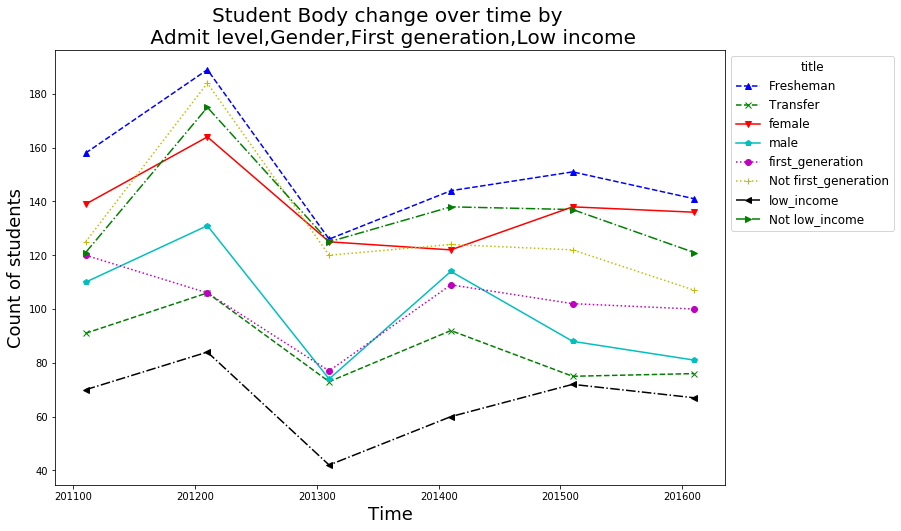

In [410]:
# plot the line plot 
fig=plt.figure(figsize=(12,8)) # set figure
ax=fig.add_subplot(111)

# set the student body data
ax.plot(freshmen['admit_term'],freshmen['value'],c='b',marker="^",ls='--',label='Fresheman') # freshmen
ax.plot(transfer['admit_term'],transfer['value'],c='g',marker="x",ls='--',label='Transfer') # transfer
ax.plot(female['admit_term'],female['value'],c='r',marker="v",ls='-',label='female') # female 
ax.plot(male['admit_term'],male['value'],c='c',marker="p",ls='-',label='male') # male
ax.plot(Yes['admit_term'],Yes['value'],c='m',marker="o",ls=':',label='first_generation') # first_generation
ax.plot(No['admit_term'],No['value'],c='y',marker="+",ls=':',label='Not first_generation') # transfer
ax.plot(Yes_low['admit_term'],Yes_low['value'],c='k',marker="<",ls='-.',label='low_income') # low income
ax.plot(No_low['admit_term'],No_low['value'],c='g',marker=">",ls='-.',label='Not low_income') #not low income

plt.xlabel('Time',fontsize=18)
plt.ylabel('Count of students',fontsize=18)
plt.title('Student Body change over time by \n Admit level,Gender,First generation,Low income',fontsize=20)
legend = plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12},title="title") # put legend to the outside of plot
legend.get_title().set_fontsize('12')
plt.draw()
fig.savefig('Student body change 1.png',dpi=300, bbox_inches = "tight")

In [371]:
# check the level in col ethn_desc
ethn_desc['ethn_desc'].unique() 

# apply ethn_desc to the function 
ethn_desc = student_body_change('ethn_desc') # apply col ethn_desc to the function 
African_American_Black = ethn_desc[ethn_desc['ethn_desc'] == 'African-American/Black']  # African_American_Black
Chinese_American_Chinese = ethn_desc[ethn_desc['ethn_desc'] == 'Chinese-American/Chinese'] # African_American_Black
East_Indian_Pakistani = ethn_desc[ethn_desc['ethn_desc'] == 'East Indian/Pakistani'] # Chinese_American_Chinese
Filipino_Filipino_American = ethn_desc[ethn_desc['ethn_desc'] == 'Filipino/Filipino-American'] # East_Indian_Pakistani
Japanese_American_Japanese = ethn_desc[ethn_desc['ethn_desc'] == 'Japanese American/Japanese'] # Japanese_American_Japanese
Korean_American_Korean = ethn_desc[ethn_desc['ethn_desc'] == 'Korean-American/Korean'] # Korean_American_Korean
Latino_Other_Spanish = ethn_desc[ethn_desc['ethn_desc'] == 'Latino/Other Spanish'] # Latino_Other_Spanish
Mexican_Am_Mexican_Chicano = ethn_desc[ethn_desc['ethn_desc'] == 'Mexican-Am/Mexican/Chicano'] # Mexican_Am_Mexican_Chicano
Other_Asian = ethn_desc[ethn_desc['ethn_desc'] == 'Other Asian'] # Other_Asian
Unknown = ethn_desc[ethn_desc['ethn_desc'] == 'Unknown'] # Unknown
Vietnamese = ethn_desc[ethn_desc['ethn_desc'] == 'Vietnamese'] # Vietnamese
White_Caucasian = ethn_desc[ethn_desc['ethn_desc'] == 'White/Caucasian'] # White_Caucasian


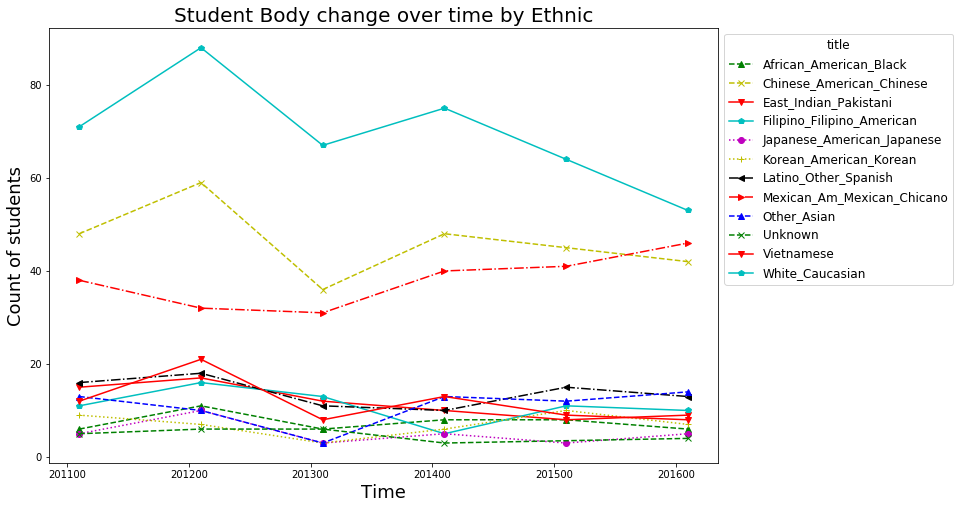

In [409]:
# plot the ethn_desc in the line chart
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)

# set ethn_desc level into data
ax.plot(African_American_Black['admit_term'],African_American_Black['value'],c='g',marker="^",ls='--',label='African_American_Black')
ax.plot(Chinese_American_Chinese['admit_term'],Chinese_American_Chinese['value'],c='y',marker="x",ls='--',label='Chinese_American_Chinese')
ax.plot(East_Indian_Pakistani['admit_term'],East_Indian_Pakistani['value'],c='r',marker="v",ls='-',label='East_Indian_Pakistani')
ax.plot(Filipino_Filipino_American['admit_term'],Filipino_Filipino_American['value'],c='c',marker="p",ls='-',label='Filipino_Filipino_American')
ax.plot(Japanese_American_Japanese['admit_term'],Japanese_American_Japanese['value'],c='m',marker="o",ls=':',label='Japanese_American_Japanese')
ax.plot(Korean_American_Korean['admit_term'],Korean_American_Korean['value'],c='y',marker="+",ls=':',label='Korean_American_Korean')
ax.plot(Latino_Other_Spanish['admit_term'],Latino_Other_Spanish['value'],c='k',marker="<",ls='-.',label='Latino_Other_Spanish')
ax.plot(Mexican_Am_Mexican_Chicano['admit_term'],Mexican_Am_Mexican_Chicano['value'],c='r',marker=">",ls='-.',label='Mexican_Am_Mexican_Chicano')
ax.plot(Other_Asian['admit_term'],Other_Asian['value'],c='b',marker="^",ls='--',label='Other_Asian')
ax.plot(Unknown['admit_term'],Unknown['value'],c='g',marker="x",ls='--',label='Unknown')
ax.plot(Vietnamese['admit_term'],Vietnamese['value'],c='r',marker="v",ls='-',label='Vietnamese')
ax.plot(White_Caucasian['admit_term'],White_Caucasian['value'],c='c',marker="p",ls='-',label='White_Caucasian')

plt.xlabel('Time',fontsize=18)
plt.ylabel('Count of students',fontsize=18)
plt.title('Student Body change over time by Ethnic',fontsize=20)
legend = plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12},title="title") # put legend to the outside of plot
legend.get_title().set_fontsize('12')
plt.draw()
fig.savefig('Student body change 2.png',dpi=300, bbox_inches = "tight")

# Is College of Biological Sciences take longer to graduate than students in other colleges?

In [373]:
df.head()

,admit_term,admit_level,gender,ethn_desc,is_urm,first_generation,low_income,first_term_college,first_degree_term,graduation_college,id
0,201110,Freshman,F,White/Caucasian,0.0,1.0,0.0,LS,NaN,NaN,1
1,201110,Freshman,F,Filipino/Filipino-American,0.0,0.0,0.0,BI,201503.0,BI,2
2,201110,Transfer,M,White/Caucasian,0.0,1.0,1.0,LS,201310.0,LS,3
3,201110,Freshman,F,Latino/Other Spanish,1.0,0.0,0.0,AE,201503.0,AE,4
4,201110,Transfer,F,East Indian/Pakistani,0.0,1.0,NaN,LS,201303.0,LS,6


In [377]:
# drop the NAN value in columns of first_term_college and graduation_college
data = df.dropna(subset=['first_term_college', 'graduation_college']) # drop NAN
data['first_degree_term'] = data['first_degree_term'].astype('int64') # change data type to int
data = data[:-1] # drop the last row which is the only one data from 2016
data.tail()

C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,admit_term,admit_level,gender,ethn_desc,is_urm,first_generation,low_income,first_term_college,first_degree_term,graduation_college,id
1183,201510,Transfer,F,Chinese-American/Chinese,0.0,0.0,0.0,AE,201703,AE,1195
1185,201510,Transfer,F,Mexican-Am/Mexican/Chicano,1.0,1.0,1.0,AE,201703,AE,1197
1186,201510,Transfer,F,African-American/Black,1.0,1.0,0.0,BI,201710,BI,1198
1191,201510,Transfer,M,White/Caucasian,0.0,1.0,NaN,LS,201701,LS,1203
1199,201510,Transfer,M,Vietnamese,0.0,0.0,0.0,BI,201703,BI,1211


In [386]:
# subset bio science student which admit in BI and also graduate with BI college
BI = data[(data['first_term_college'] == 'BI') & (data['graduation_college'] == 'BI')]

# function to add '-' to the admit term and degree term 
def getTime(t):
    """This function return the number with '-' after 4 digs 
    e.g. 201110 to 2011-10
    It can easy to convert str to the time format later on."""
    return t[:4] + '-' + t[4:]

# Change admit_term column to str type then convert to time format
BI['admit_term'] = BI['admit_term'].astype('str')  #change obj to the str 
BI['admit_term'] = BI['admit_term'].apply(getTime) # apply the admit term string to the function get the time-like array
BI['admit_term'] = pd.to_datetime(BI['admit_term']) # convert it to the time format

# change first_degree_term column to data type then conver to time format
BI['first_degree_term'] = BI['first_degree_term'].astype('str')
BI['first_degree_term'] = BI['first_degree_term'].apply(getTime)
BI['first_degree_term'] = pd.to_datetime(BI['first_degree_term'])


BI.dtypes # check the data types

# find the time lenghth of the BI college student to graduate 
BI['time length'] = BI['first_degree_term'] - BI['admit_term'] 
# convert the column to the date type 
BI['time length'] = BI['time length'].dt.days

# subset the BI school to the freshman and transfer
BI_freshman = BI[BI['admit_level'] == 'Freshman'] # freshman 
BI_transfer = BI[BI['admit_level'] == 'Transfer'] # transfer



C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [387]:
# subset the other college except BI
other = data.query("first_term_college != 'BI' & graduation_college != 'BI'")

# Change admit_term column to str type then convert to time format
other['admit_term'] = other['admit_term'].astype('str')  #change obj to the str 
other['admit_term'] = other['admit_term'].apply(getTime) # apply the admit string to the function
other['admit_term'] = pd.to_datetime(other['admit_term']) # convert to the time format

# change first_degree_term column to data type then conver to time format
other['first_degree_term'] = other['first_degree_term'].astype('str')
other['first_degree_term'] = other['first_degree_term'].apply(getTime)
other['first_degree_term'] = pd.to_datetime(other['first_degree_term'])

# find the time lenghth of the other college student to graduate 
other['time length'] = other['first_degree_term'] - other['admit_term'] 
# convert the column to the date type 
other['time length'] = other['time length'].dt.days

# subset the other school to the freshman 
Other_freshman = other[other['admit_level'] == 'Freshman'] # freshman
# subset the other school to the transfer
Other_transfer = other[other['admit_level'] == 'Transfer'] #transfer



C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\jolie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [388]:
# prepare data to plot
freshmens = pd.concat([BI_freshman, BI_transfer,Other_freshman,Other_transfer],keys=['BI_freshman', 'BI_transfer','Other_freshman','Other_transfer']) # concate data together
freshmens = freshmens.reset_index() # reset index
freshmens.columns.values[[0]] = ['name'] # change first col name to the name
Outlier = freshmens.loc[freshmens['time length'].idxmin()] # loc the outlier
freshmens = freshmens.reindex() # reindex the data to loc the outlier
freshmens =freshmens.drop([73]) # remove the outlier


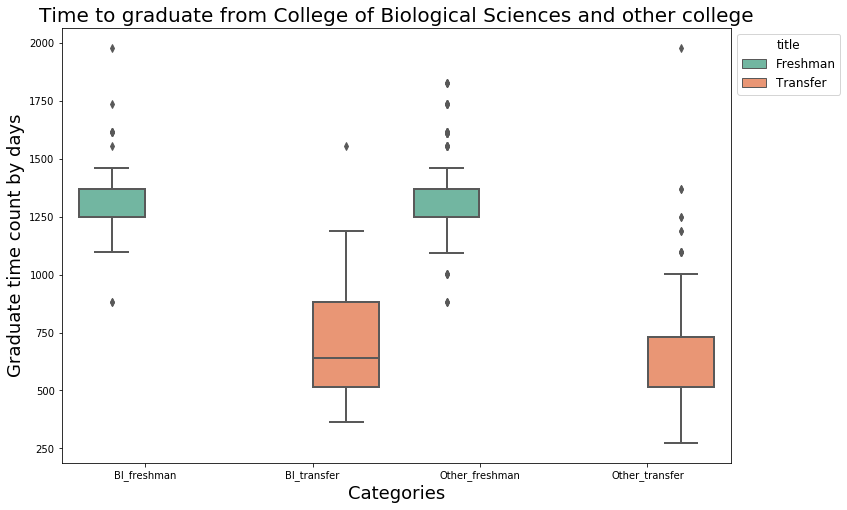

In [408]:
# plot boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x="name", y="time length", hue="admit_level", data=freshmens, palette="Set2",linewidth=2)
plt.xlabel('Categories',fontsize=18)
plt.ylabel('Graduate time count by days',fontsize=18)
plt.title('Time to graduate from College of Biological Sciences and other college',fontsize=20)
legend = plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12},title="title") # put legend to the outside of plot
legend.get_title().set_fontsize('12')
plt.savefig('Graduation time.png',dpi=300, bbox_inches = "tight")
